In [10]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles 
from bokeh.plotting import figure, output_file, show
from pywaffle import Waffle
import squarify
import plotly.express as px
import waterfall_chart

In [11]:
## IMPORT DATA
Rapido=pd.read_excel("C:\\Users\\DELL\\OneDrive\\Desktop\\Rapido Project\\Rapido.xlsx")

In [12]:
Rapido

,Unnamed: 0,Ride_ID,Date,Time,Customer_ID,Vehicle_Type,Pickup_Area,Drop_Area,Distance_km,Fare_INR,Status,Cancellation_Reason,Service_Level,Payment_Method
0,1,R-1001,2024-01-11,18:15:00,C-534,NaN,Hebbal,Hebbal,11.8,354.0,Completed,NaN,Economic,Wallet
1,2,R-1002,2024-01-07,15:00:00,C-514,Cab,Electronic City,Hebbal,2.4,72.0,Cancelled,Captain Late,Economic,Card
2,3,R-1003,2024-01-20,20:15:00,C-532,Bike,Indiranagar,NaN,3.3,59.0,Completed,NaN,Basic,Cash
3,4,R-1004,2024-01-20,16:15:00,C-517,Auto Share,Indiranagar,Bellandur,9.4,112.0,Completed,NaN,Economic,Card
4,5,R-1005,2024-01-09,22:30:00,C-536,Parcel,Whitefield,Indiranagar,11.9,178.0,Completed,NaN,Delivery,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,R-1096,2024-01-02,22:30:00,C-543,Bike,MG Road,Indiranagar,7.8,140.0,Completed,NaN,Basic,Card
96,97,R-1097,2024-01-16,20:15:00,C-549,Bike,HSR Layout,Bellandur,8.0,144.0,Cancelled,Changed Mind,Basic,Wallet
97,98,R-1098,2024-01-11,13:15:00,C-550,Bike,Koramangala,Marathahalli,2.9,52.0,Completed,NaN,Basic,Card
98,99,R-1099,2024-01-12,13:00:00,C-540,Auto,Electronic City,Whitefield,2.6,46.0,Completed,NaN,Basic,Card


In [13]:
## Aggregating data by calculating the total transcation values
file=Rapido.groupby(by=['Vehicle_Type']) ['Fare_INR'].sum().reset_index()

In [14]:
##SETTING THE COLUMNS WITH THE DATES AND INDEX
file_index=file.set_index('Vehicle_Type')

In [15]:
file_index

,Fare_INR
Vehicle_Type,
Auto,2325.0
Auto Share,1256.0
Bike,2432.0
Cab,5180.0
Parcel,1389.0


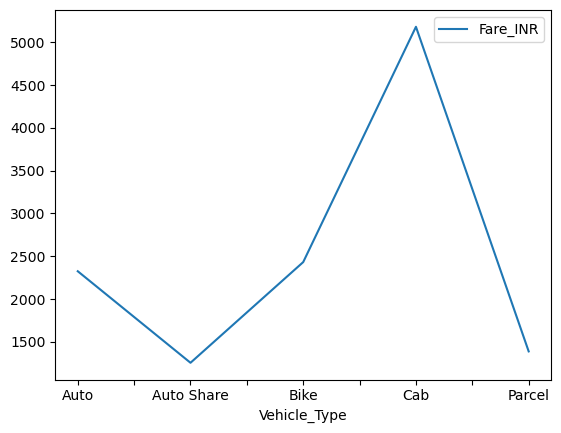

In [16]:
file_index.plot()
plt.show()

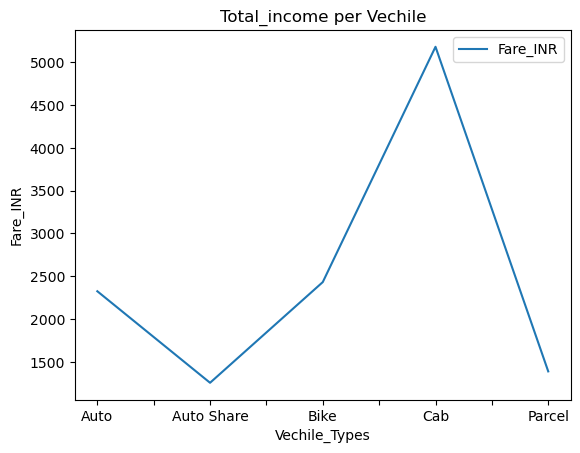

In [25]:
## adding the labeling
file_index.plot()
plt.title('Total_income per Vechile')
plt.xlabel('Vechile_Types')
plt.ylabel('Fare_INR')
plt.show()

In [18]:
## agregating data by calculating the total transcation Values
file=Rapido.groupby(by=['Status','Date',])['Fare_INR'].sum().reset_index()

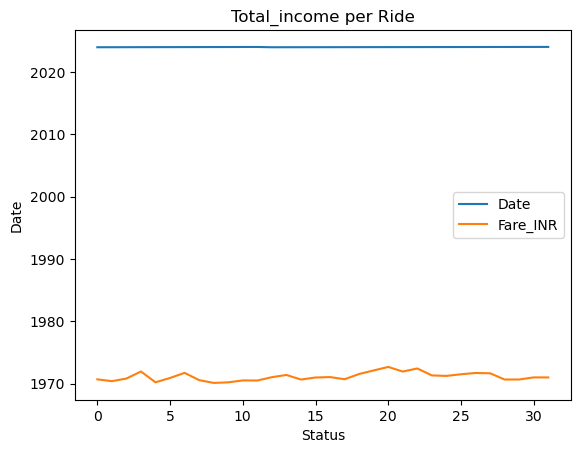

In [26]:
file.plot()
plt.title ('Total_income per Ride')
plt.xlabel('Status')
plt.ylabel('Date')
plt.show()

In [ ]:
file

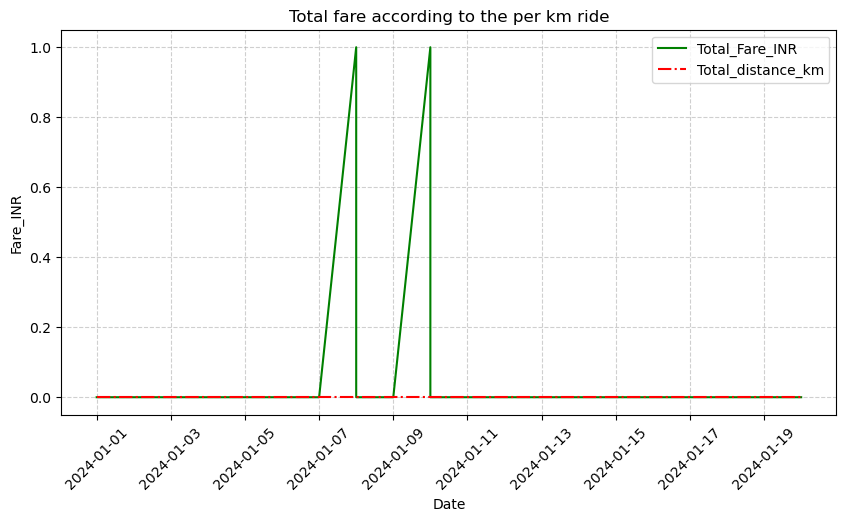

In [20]:
## Aggregating data by calculating total fare and point occured
file_1=Rapido.groupby(by=['Date','Time']).agg({'Fare_INR':'sum','Distance_km':'sum'}).reset_index()
#Setting the columns day as index
file_2=file_1.set_index('Date')
#Creating line plot
plt.figure(figsize=(10,5))
plt.plot(file_2['Fare_INR'] > 500, c='green',label='Total_Fare_INR')
plt.plot(file_2['Distance_km'] >40,'-.',c='red',label='Total_distance_km')
##adding athestics
plt.title("Total fare according to the per km ride")
plt.xlabel( "Date")
plt.ylabel("Fare_INR")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--',alpha=0.6)
plt.show()


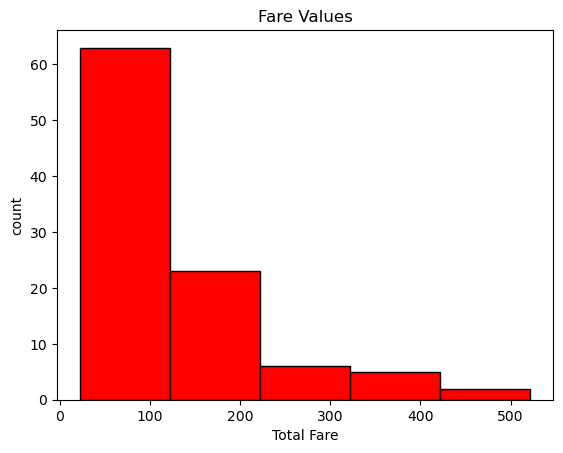

In [21]:
Rapido.Fare_INR.plot(kind="hist",color="red",edgecolor="black",bins= 5)
plt.title('Fare Values')
plt.xlabel('Total Fare')
plt.ylabel('count')
plt.show()

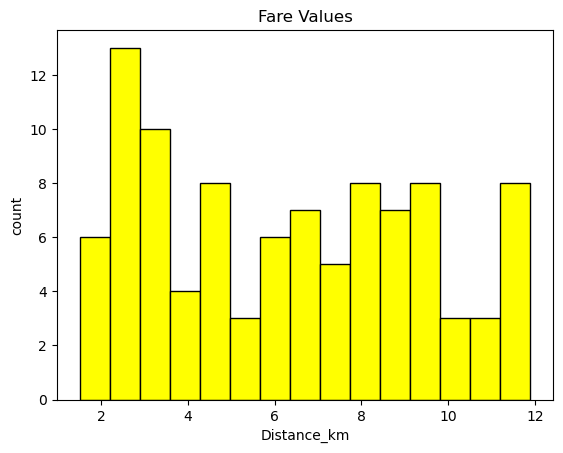

In [22]:
plt.hist(x= Rapido['Distance_km'],color="yellow",edgecolor="black",bins= 15)
plt.title('Fare Values')
plt.xlabel('Distance_km')
plt.ylabel('count')
plt.show()

<Axes: xlabel='Fare_INR', ylabel='Count'>

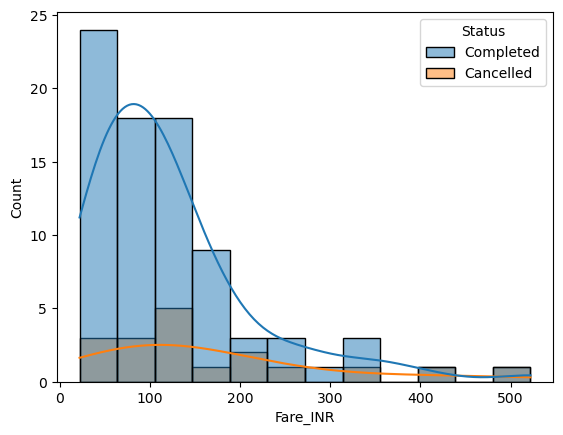

In [23]:
## Creating a histogram
sns.histplot(x='Fare_INR',data= Rapido, kde=True, hue= 'Status')

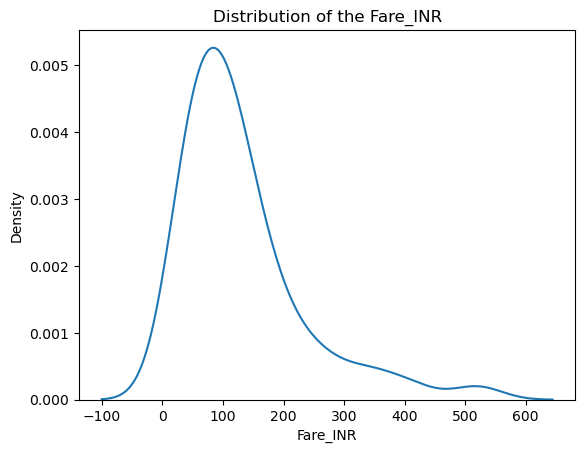

In [24]:
## KDE plot
sns.kdeplot(Rapido['Fare_INR'])
plt.title('Distribution of the Fare_INR')
plt.xlabel('Fare_INR')
plt.show()